# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Tilt Table Short Data (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) ##
The arterial blood pressure (ABP) signal of a patient lying on a tilt table.

m = 180, length of a cardiac cycle (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 200 (MP VII) BEST RESULTS

m = 205 (own research) 

In [2]:
# Parameter
use_case = "chains"
data_name = "tilttableshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "tilt_table")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [3]:
# Hyperparameter
target_w = 180
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [4]:
# calculate:
# calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Visualizing Experiment: target_w=180, m=None, offset=False, groundtruthD1=True, nonoverlapping=False
chain for d=1, m=180, w=180: [5671 6070 6464 6659 7414 7609 7992 9162 9548]
chain for d=2, m=91, w=181: [5886 6281 6476 6669 7426 7620 8003 8200 9175 9559]
chain for d=3, m=61, w=181: [5886 6281 6476 6669 7426 7620 8003 8200 9175 9559]
chain for d=4, m=46, w=181: [5886 6281 6476 6669 7426 7620 8003 8200 9175 9559]
chain for d=5, m=37, w=181: [5887 6282 6477 6670 7427 7621 8004 8201 9176 9560]
chain for d=6, m=31, w=181: [5079 5277 5474 5674 6073 6467 6662 7418 7612 7995 8190]
chain for d=7, m=27, w=183: [5668 6067 6461 6656 7411 7605 7988 9158 9544 9739]
chain for d=8, m=23, w=177: [5886 6282 6477 6670 7427 7621 8004 8201 9176 9560 9759]
chain for d=9, m=21, w=181: [5669 6068 6463 6658 7413 7608 7991 9161 9547]
chain for d=10, m=19, w=181: [5117 5313 5513 5912 6307 6502 6695 7452 8029 8226]
chain for d=11, m=17, w=177: [5887 6282 6477 6670 7427 7621 8004 8201 9176 9560 9759]
chain for d

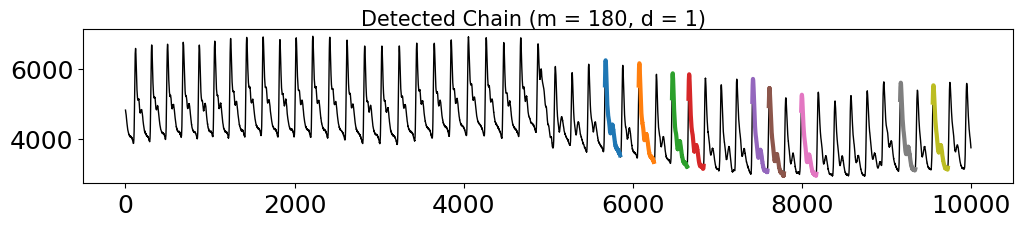

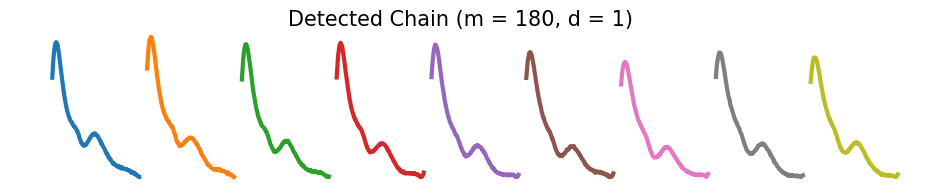

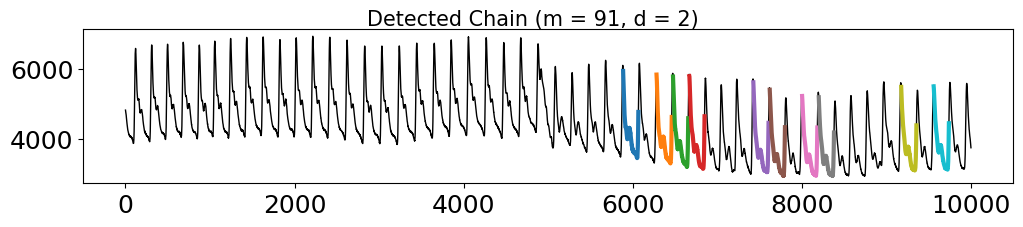

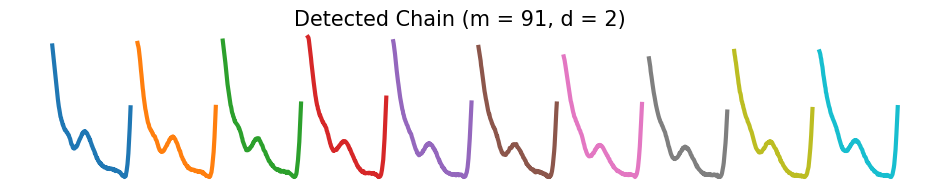

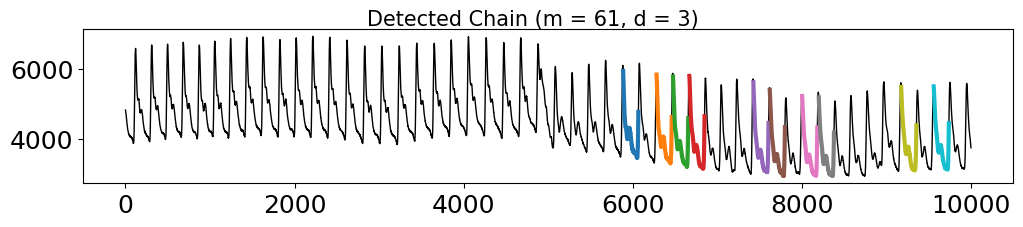

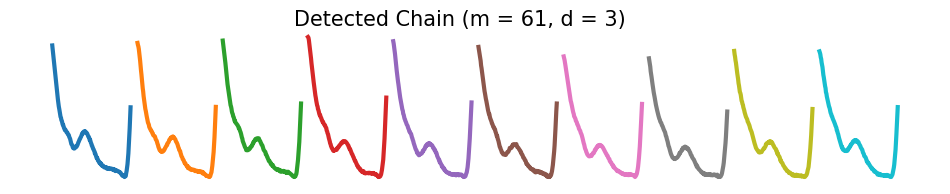

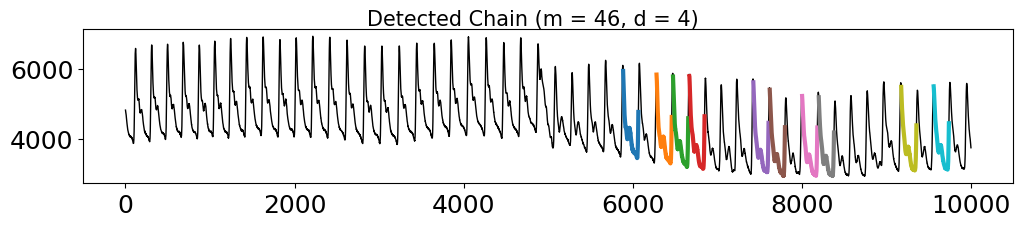

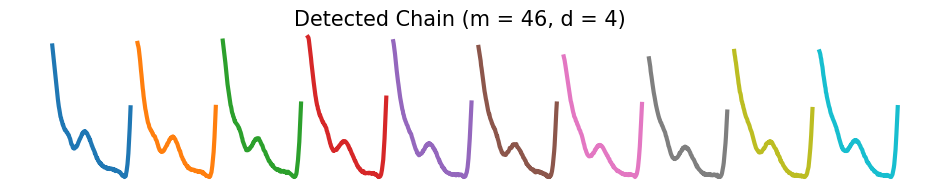

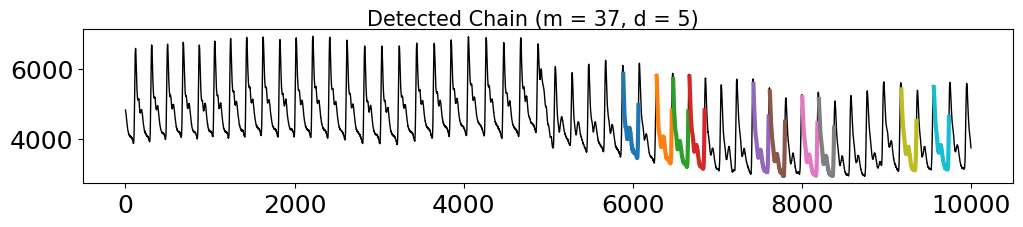

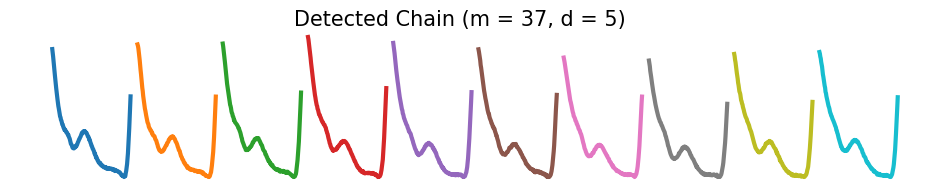

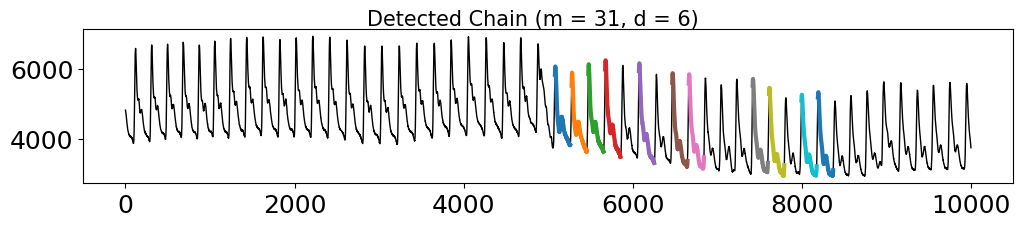

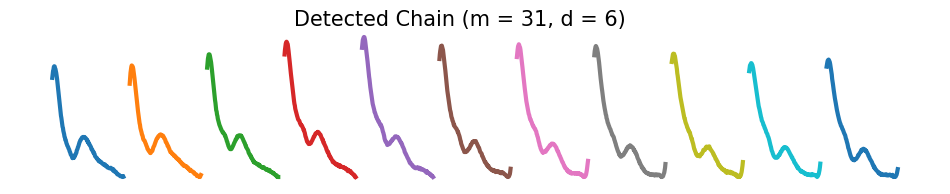

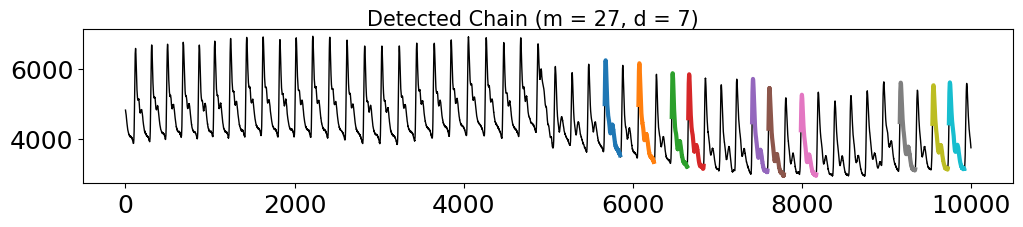

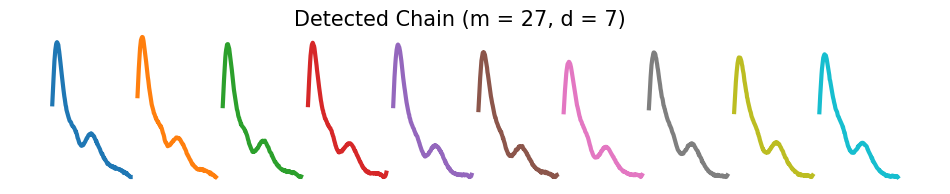

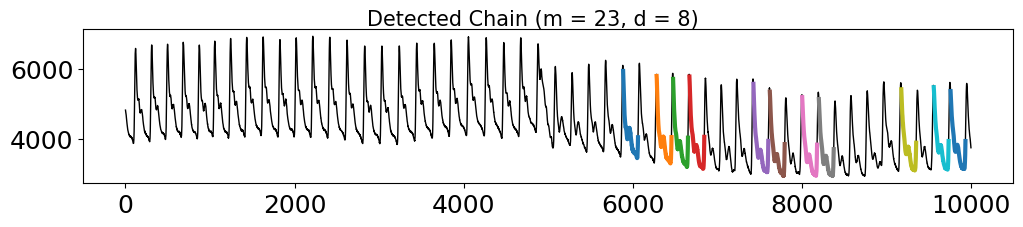

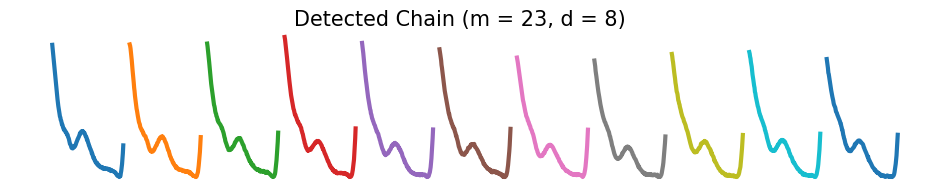

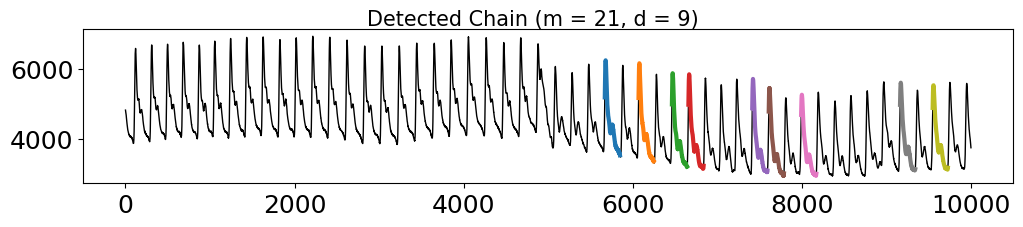

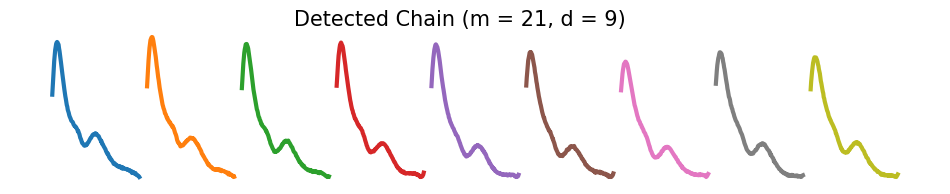

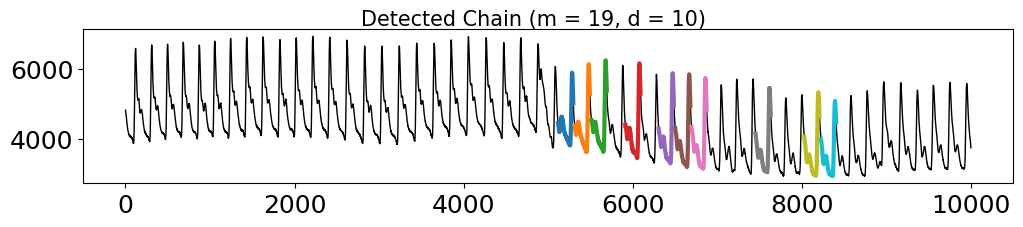

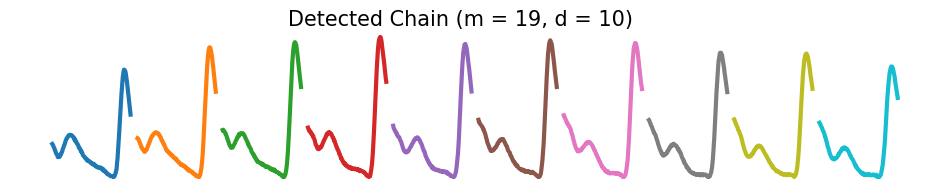

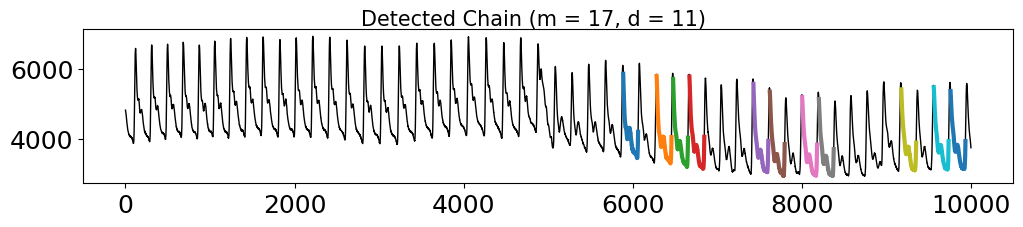

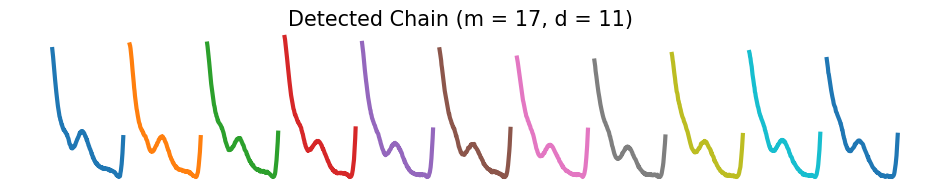

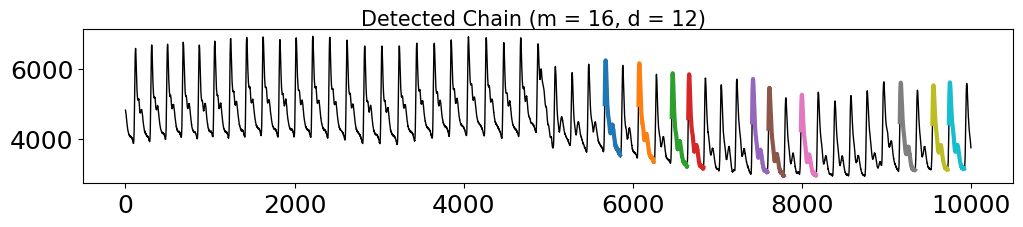

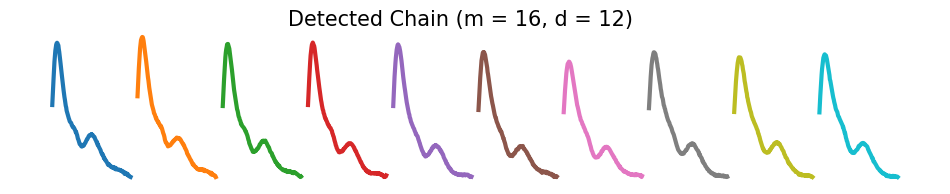

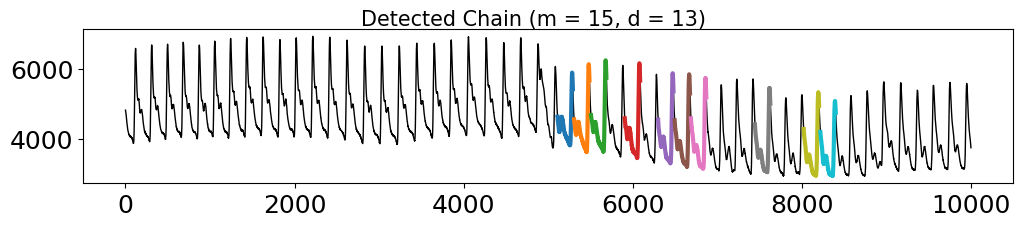

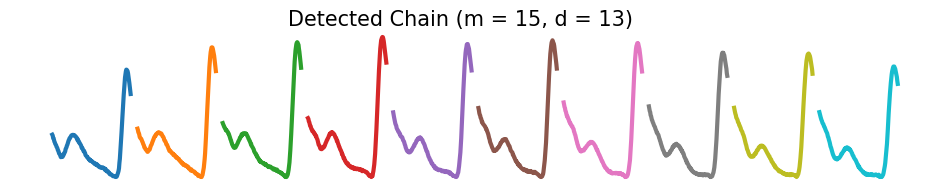

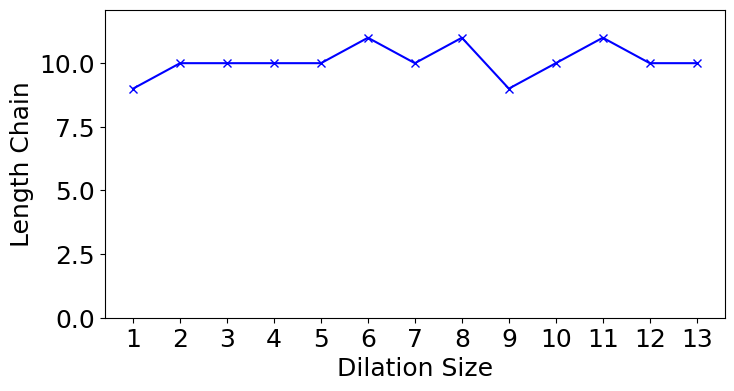

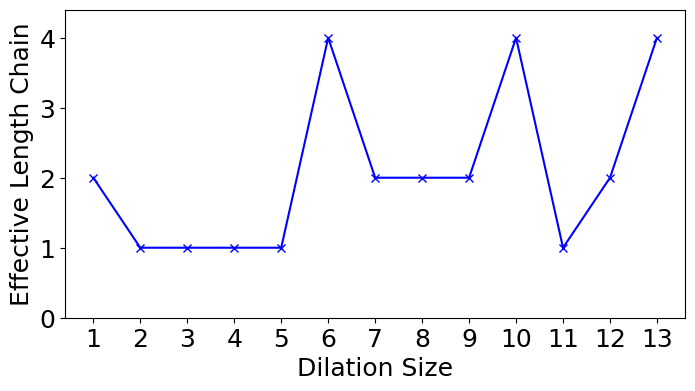

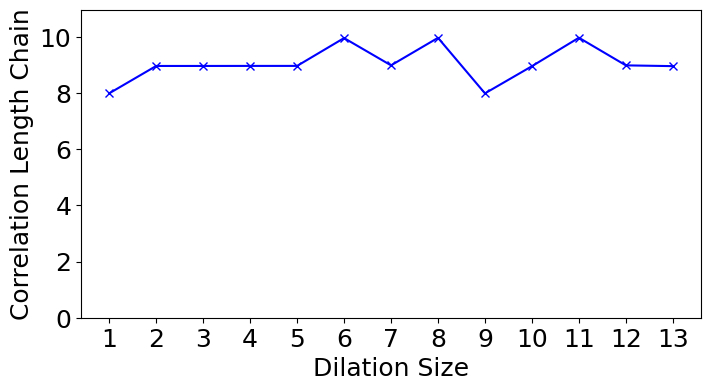

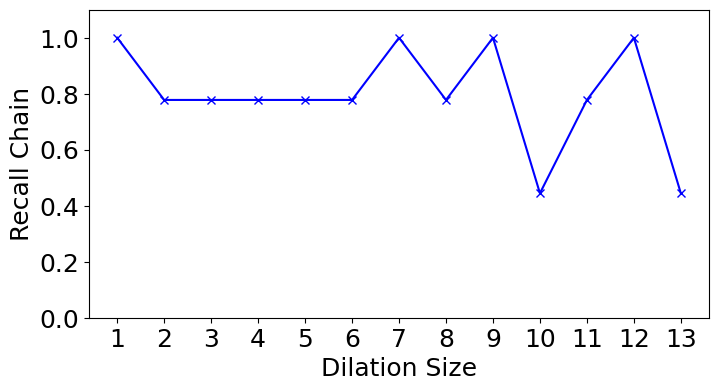

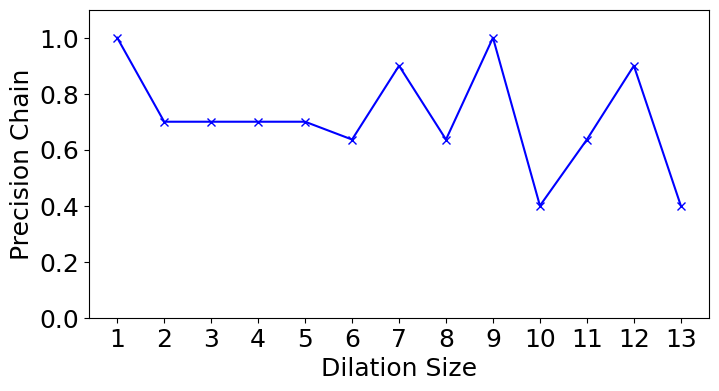

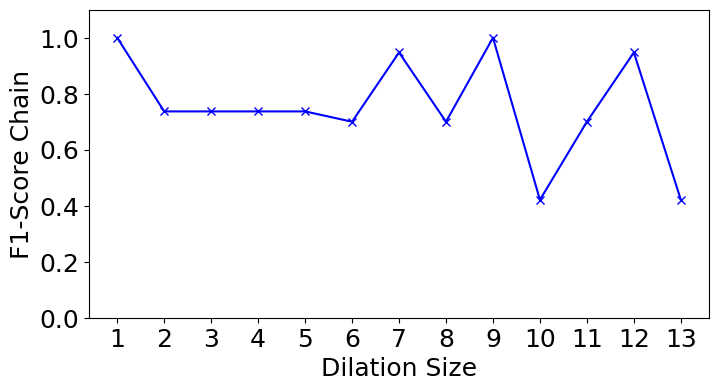

In [5]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)